# Bài 1:  
Mẫu dưới đây thu nhận ngẫu nhiên độ tuổi của người mắc bệnh tiểu đường ở một địa bàn 
trong thời gian khảo sát: 

35 37 40 42 55 57 60 61 66 45 

Có ý kiến cho rằng "Người mắc bệnh tiểu đường có độ tuổi trung bình trên 45 tuổi". Với 
mức ý nghĩa 5% bạn hãy kiểm định ý kiến này đúng hay sai? Hãy tính toán và đưa ra kết 
luận? 

In [8]:
import numpy as np
from scipy import stats

data = np.array([35, 37, 40, 42, 55, 57, 60, 61, 66, 45])

n = len(data)  
x_bar = np.mean(data)  
s = np.std(data, ddof=1)  
mu_0 = 45

t_stat = (x_bar - mu_0) / (s / np.sqrt(n))

p_value = 1 - stats.t.cdf(t_stat, df=n-1)

t_critical = stats.t.ppf(0.95, df=n-1)

print(f"Trung bình mẫu: {x_bar:.2f}")
print(f"Độ lệch chuẩn mẫu: {s:.2f}")
print(f"Giá trị kiểm định t: {t_stat:.2f}")
print(f"Giá trị tới hạn t: {t_critical:.2f}")
print(f"P-value: {p_value:.4f}")

if t_stat > t_critical:
    print("Bác bỏ H0: Có đủ bằng chứng để kết luận tuổi trung bình lớn hơn 45.")
else:
    print("Không bác bỏ H0: Không có đủ bằng chứng để kết luận tuổi trung bình lớn hơn 45.")


Trung bình mẫu: 49.80
Độ lệch chuẩn mẫu: 11.22
Giá trị kiểm định t: 1.35
Giá trị tới hạn t: 1.83
P-value: 0.1046
Không bác bỏ H0: Không có đủ bằng chứng để kết luận tuổi trung bình lớn hơn 45.


# Bài 2:  
Điều tra chi tiêu hàng năm của 40 công nhân khu công nghiệp A thấy trung bình mẫu là 
34 triệu đồng và độ lệch chuẩn mẫu là 5,8 triệu đồng. Điều tra công nhân tại khu công 
nghiệp B thì chi tiêu trung bình là 35 triệu đồng và độ lệch chuẩn là 5 triệu đồng. 

- Với mức ý nghĩa 5%, có thể cho rằng chỉ tiêu trung bình của công nhân khu công 
nghiệp A và B là như nhau không? 
- Tính p-value của kiểm định và cho biết kết luận thu được có thể mắc phải sai lầm loại 
mấy? Giả thiết chi tiêu công nhân là biến ngẫu nhiên phân phối chuẩn. 

H0: Trung bình chi tiêu của công nhân hai khu công nghiệp là như nhau

H1: Trung bình chi tiêu của công nhân hai khu công nghiệp khác nhau

In [10]:
import scipy.stats as stats

x_A, s_A, n_A = 34, 5.8, 40 
x_B, s_B, n_B = 35, 5.0, 40  

t_stat = (x_A - x_B) / ((s_A**2 / n_A + s_B**2 / n_B) ** 0.5)

df = ((s_A**2 / n_A + s_B**2 / n_B) ** 2) / (
    ((s_A**2 / n_A) ** 2) / (n_A - 1) + ((s_B**2 / n_B) ** 2) / (n_B - 1)
)

p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

print(f"T-statistic: {t_stat:.4f}")
print(f"Degrees of Freedom: {df:.2f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Bác bỏ giả thuyết H0: Có sự khác biệt về chi tiêu trung bình.")
else:
    print("Không có đủ bằng chứng để bác bỏ H0: Chi tiêu trung bình có thể là như nhau.")


T-statistic: -0.8259
Degrees of Freedom: 76.34
P-value: 0.4114
Không có đủ bằng chứng để bác bỏ H0: Chi tiêu trung bình có thể là như nhau.


# Bài 3: 
Quảng cáo của một công ty cho rằng tỷ lệ phế phẩm của công ty trên thị trường tối đa là 
12%. Kiểm tra 400 sản phẩm của công ty trên thị trường thì có 60 phế phẩm. Với mức ý 
nghĩa 5% có thể cho rằng quảng cáo của công ty là đúng không?

In [11]:
import numpy as np
import scipy.stats as stats

n = 400 
x = 60 
p_hat = x / n 
p_0 = 0.12  

z_stat = (p_hat - p_0) / np.sqrt((p_0 * (1 - p_0)) / n)

p_value = 1 - stats.norm.cdf(z_stat)

print(f"Tỷ lệ phế phẩm quan sát: {p_hat:.4f}")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Bác bỏ giả thuyết H0: Tỷ lệ phế phẩm > 12%, quảng cáo không đúng.")
else:
    print("Không có đủ bằng chứng để bác bỏ H0: Quảng cáo có thể đúng.")


Tỷ lệ phế phẩm quan sát: 0.1500
Z-statistic: 1.8464
P-value: 0.0324
Bác bỏ giả thuyết H0: Tỷ lệ phế phẩm > 12%, quảng cáo không đúng.


# Bài 4: 
Cài đặt giải thuật KNN và áp dụng giải thuật KNN tự viết cho bộ dữ liệu hoa Iris: 

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from collections import Counter

In [23]:
df = pd.read_csv(r'D:\S2_Year3\Machine Learning\Theory\WEEK_3\iris.csv')
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [45]:
# 4.1 Chia dữ liệu thành 2 phần theo tỉ lệ 8/2 
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# 4.2 Chuẩn hóa các cột đặc trưng dữ liệu (4 cột đầu) 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
# 4.3 Cài đặt hàm tính độ đo Euclid

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(x1-x2) ** 2)

In [46]:
# 4.4 Cài đặt giải thuật KNN với độ đo khoảng cách Euclid

class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        knl = [self.y_train[i] for i in k_indices]
        most_common = Counter(knl).most_common(1)
        return most_common[0][0]

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

In [53]:
# 4.5 Lựa chọn các tham số k khác nhau và cho biết kết quả

k_values = [1, 3, 5, 7, 9]
accuracies = []
f1_scores = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)

    print(f'K={k}: Accuracy={acc:.2f}, F1-score={f1:.2f}')



K=1: Accuracy=0.87, F1-score=0.86
K=3: Accuracy=0.90, F1-score=0.90
K=5: Accuracy=0.90, F1-score=0.90
K=7: Accuracy=0.90, F1-score=0.90
K=9: Accuracy=0.93, F1-score=0.93


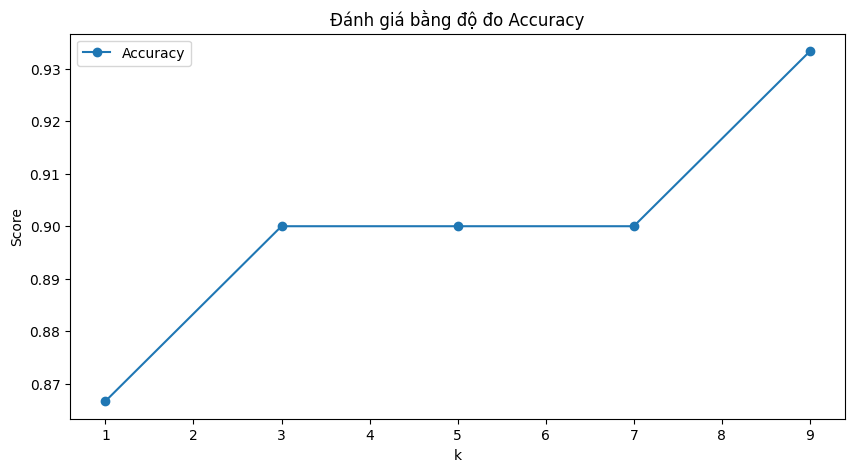

In [59]:
# 4.6 Đánh giá bằng độ đo Accuracy, trực quan hóa kết quả 
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, label="Accuracy", marker='o')
plt.xlabel("k")
plt.ylabel("Score")
plt.title("Đánh giá bằng độ đo Accuracy")
plt.legend()
plt.show()

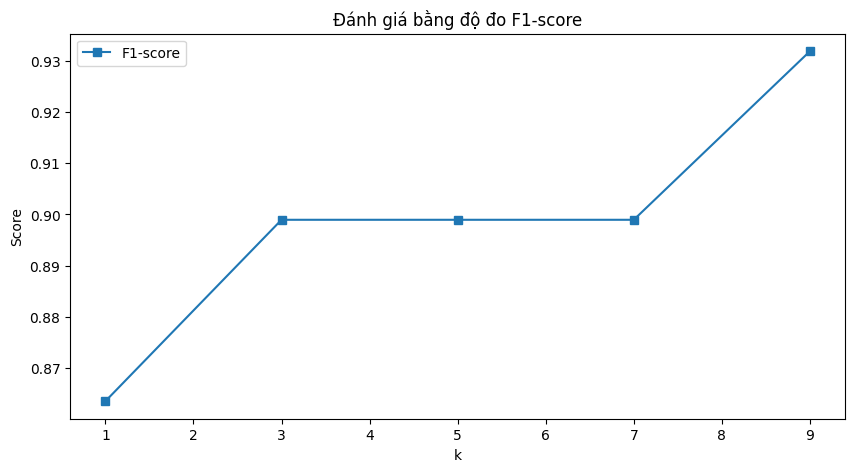

In [58]:
# 4.7 Đánh giá bằng độ đo F1-score, trực quan hóa kết quả 
plt.figure(figsize=(10, 5))
plt.plot(k_values, f1_scores, label="F1-score", marker='s')
plt.xlabel("k")
plt.ylabel("Score")
plt.title("Đánh giá bằng độ đo F1-score")
plt.legend()
plt.show()

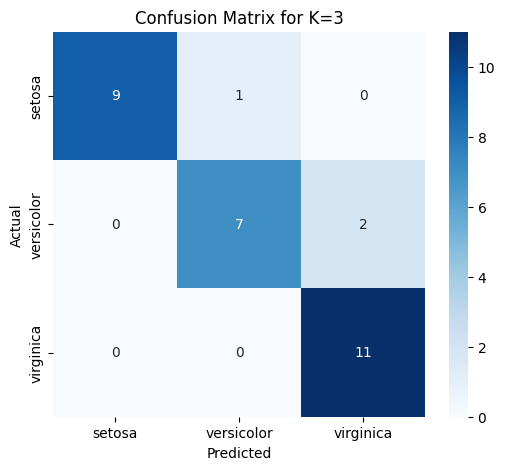

In [60]:
# 4.8 Đánh giá bằng độ đo Confusion Matrix, trực quan hóa kết quả 
knn = KNN(k=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for K=3")
plt.show()

Sklearn KNN - Accuracy: 1.00, F1-score: 1.00


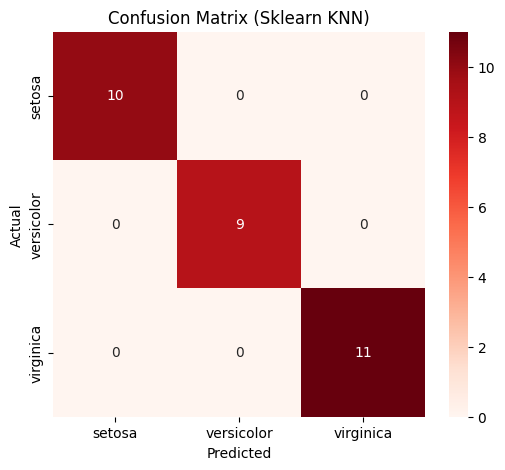

In [61]:
# 4.9 So sánh kết quả với giải thuật KNN từ thư viện sklearn với 3 độ đo trên 

from sklearn.neighbors import KNeighborsClassifier

knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train, y_train)
y_pred_sklearn = knn_sklearn.predict(X_test)

acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn, average='weighted')
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_sklearn)

print(f"Sklearn KNN - Accuracy: {acc_sklearn:.2f}, F1-score: {f1_sklearn:.2f}")

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_sklearn, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Sklearn KNN)")
plt.show()

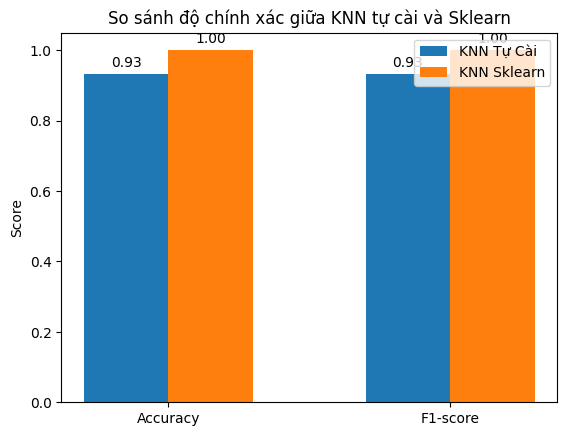

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Giá trị từ KNN tự cài đặt
knn_acc = max(accuracies)
knn_f1 = max(f1_scores)

# Giá trị từ Sklearn KNN
sklearn_acc = acc_sklearn
sklearn_f1 = f1_sklearn

# Vẽ biểu đồ cột
labels = ['Accuracy', 'F1-score']
knn_values = [knn_acc, knn_f1]
sklearn_values = [sklearn_acc, sklearn_f1]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, knn_values, width, label='KNN Tự Cài')
bars2 = ax.bar(x + width/2, sklearn_values, width, label='KNN Sklearn')

ax.set_ylabel('Score')
ax.set_title('So sánh độ chính xác giữa KNN tự cài và Sklearn')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Hiển thị giá trị trên cột
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.show()
